# Assignment - 18 Forecasting (Airlines data)

## Import necessary libraries

In [1]:
import pandas as pd

from matplotlib import pyplot as plt

import seaborn as sns

import statsmodels.formula.api as smf

import numpy as np

import warnings
warnings.filterwarnings('ignore')

## Import data

In [2]:
airline=pd.read_excel(r'D:\Downloads\Airlines+Data.xlsx')
airline

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


## Data understanding

In [3]:
airline.shape

(96, 2)

In [4]:
airline.isna().sum()

Month         0
Passengers    0
dtype: int64

In [5]:
airline.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

Text(0.5, 1.0, 'Passengers data')

<Figure size 1080x720 with 0 Axes>

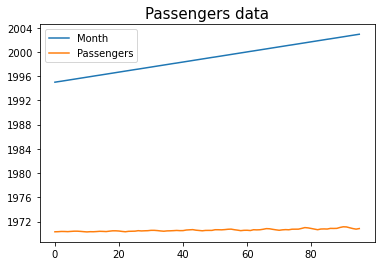

In [6]:
plt.figure(figsize=(15,10))
airline.plot()
plt.title('Passengers data', size=15)

## Model Preparation

In [7]:
airline['Months']=airline['Month'].dt.strftime('%b')
airline['Year']=airline['Month'].dt.strftime('%Y')
airline

,Month,Passengers,Months,Year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


### Year wise distribution

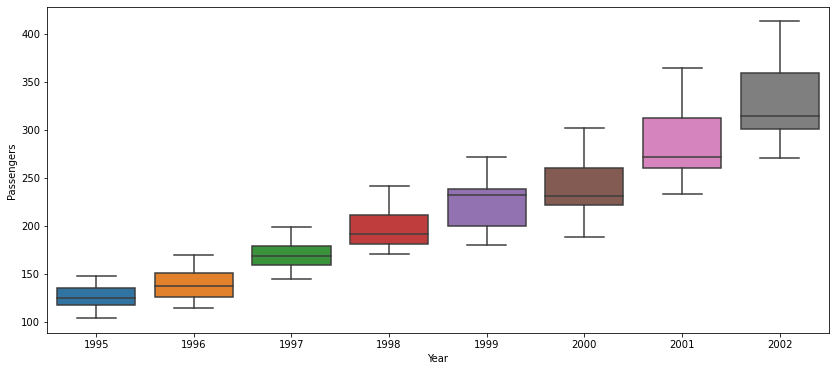

In [8]:
plt.figure(figsize=(14,6))
sns.boxplot(x='Year',y='Passengers',data=airline)
plt.show()

### Month wise distribution

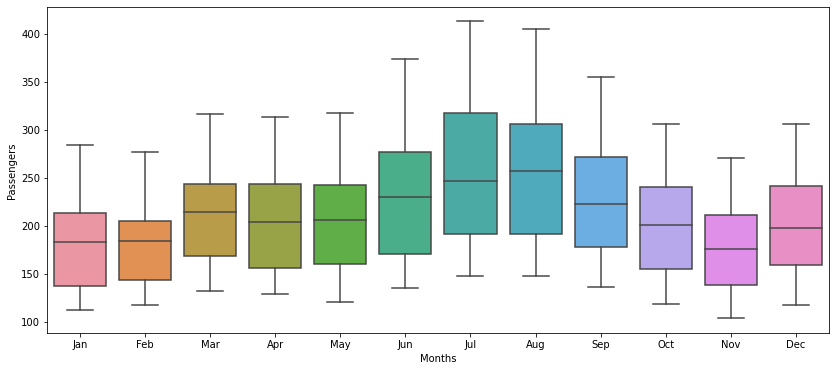

In [9]:
plt.figure(figsize=(14,6))
sns.boxplot(x='Months',y='Passengers',data=airline)
plt.show()

In [10]:
airline1=pd.pivot_table(data=airline,values='Passengers',index='Year',columns='Months').fillna(0)
airline1

Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Year,,,,,,,,,,,,
1995,129,148,118,118,112,148,135,132,121,104,119,136
1996,135,170,140,126,115,170,149,141,125,114,133,158
1997,163,199,166,150,145,199,178,178,172,146,162,184
1998,181,242,194,180,171,230,218,193,183,172,191,209
1999,235,272,201,196,196,264,243,236,229,180,211,237
2000,227,293,229,188,204,302,264,235,234,203,229,259
2001,269,347,278,233,242,364,315,267,270,237,274,312
2002,313,405,306,277,284,413,374,317,318,271,306,355


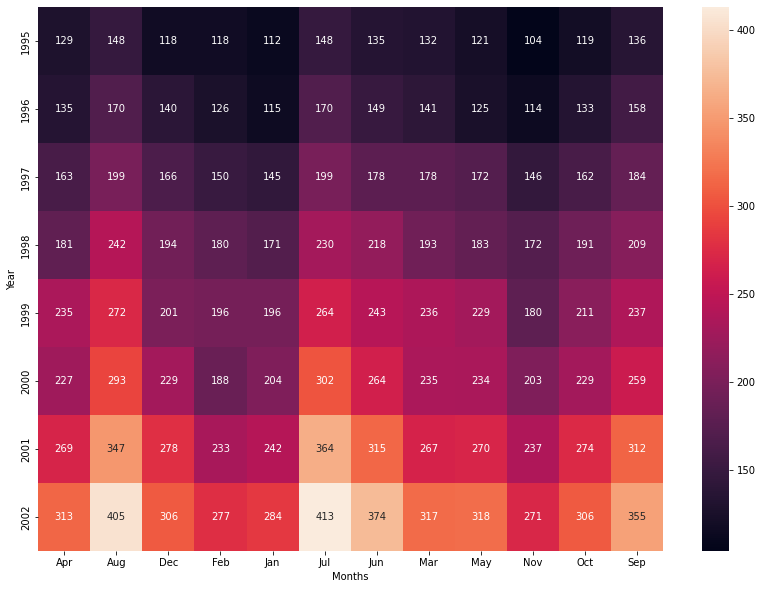

In [11]:
plt.figure(figsize=(14,10))
sns.heatmap(airline1,annot=True,fmt='g')
plt.show()

## Model Building

In [12]:
airline.shape

(96, 4)

In [13]:
dumies = pd.DataFrame(pd.get_dummies(airline.Months))

In [14]:
airline = pd.concat([airline,dumies],axis=1)

In [15]:
airline['t']=range(1,97)

In [16]:
airline['t_square'] = airline.t*airline.t

In [17]:
airline['log_Passengers'] = np.log(airline.Passengers)

In [18]:
airline

,Month,Passengers,Months,Year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers
0,1995-01-01,112,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,2002-09-01,355,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,2002-10-01,306,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585
94,2002-11-01,271,Nov,2002,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119


In [19]:
train_data=airline.head(70)

In [20]:
test_data=airline.tail(26)

In [21]:
train_data.shape

(70, 19)

In [22]:
test_data.shape

(26, 19)

## Model training // Model testing // Model evaluation

### Model 1 - Linear

In [23]:
airline2=smf.ols('Passengers~t',data =train_data).fit()
airline3=airline2.predict(test_data['t'])
linear=np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(airline3))**2))
linear

48.30985585336209

### Model 2 - Exponential

In [24]:
airline4=smf.ols('log_Passengers~t',data =train_data).fit()
airline5=airline4.predict(test_data['t'])
exponential=np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(np.exp(airline5)))**2))
exponential

43.47847070446902

### Model 3 - Quadratic model

In [25]:
airline6=smf.ols('Passengers~t+t_square',data =train_data).fit()
airline7=airline6.predict(test_data[['t','t_square']])
quad_mod=np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(airline7))**2))
quad_mod

43.89814496742656

### Model 4 - Additive model

In [26]:
airline8=smf.ols('Passengers~Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data =train_data).fit()
airline9=airline8.predict(test_data[['Apr','Aug','Dec','Feb','Jan','Jul','Jun','Mar','May','Nov','Oct','Sep']])
add_mod=np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(airline9))**2))
add_mod

124.97569951828814

### Model 5 - Additive model quadratic

In [27]:
airline10=smf.ols('Passengers~t+t_square+Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data =train_data).fit()
airline11=airline10.predict(test_data[['t','t_square','Apr','Aug','Dec','Feb','Jan','Jul','Jun','Mar','May','Nov','Oct','Sep']])
add_mod_quad=np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(airline11))**2))
add_mod_quad

30.393042895923564

### Model 6 - Multiplicative seasonality

In [28]:
airline12=smf.ols('log_Passengers~Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data =train_data).fit()
airline13=airline12.predict(test_data[['Apr','Aug','Dec','Feb','Jan','Jul','Jun','Mar','May','Nov','Oct','Sep']])
multi_seas=np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(np.exp(airline13)))**2))
multi_seas

129.629144765263

### Model 7 - Multiplicative additive seasonality

In [29]:
airline14=smf.ols('log_Passengers~t+Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data =train_data).fit()
airline15=airline14.predict(test_data[['t','Apr','Aug','Dec','Feb','Jan','Jul','Jun','Mar','May','Nov','Oct','Sep']])
multi_add_seas=np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(np.exp(airline15)))**2))
multi_add_seas

11.724791415288141

## Compare the results

In [30]:
airline16={"MODEL":pd.Series(["linear","exponential","quad_mod","add_mod","add_mod_quad","multi_seas","multi_add_seas"]),
           "RMSE Values":pd.Series([linear,exponential,quad_mod,add_mod,add_mod_quad,multi_seas,multi_add_seas])}
airline17=pd.DataFrame(airline16)
airline17.sort_values(["RMSE Values"])

,MODEL,RMSE Values
6,multi_add_seas,11.724791
4,add_mod_quad,30.393043
1,exponential,43.478471
2,quad_mod,43.898145
0,linear,48.309856
3,add_mod,124.975700
5,multi_seas,129.629145
